# Sept 22 project session #Cardio Vascular disease prediction

"""Analysis and Prediction 

Abstract
cardiovascular diseases are the first leading cause of death across the world as well. World Health Organization has estimated 
that the mortality rate caused by heart diseases will mount to 23 million cases by 2030. Hence, the use of data mining 
algorithms could be useful in predicting coronary artery diseases. 

Objective
The objective of this research is to build classifiers to predict whether a person has cardiovascular disease based on 
their medical test, age, and gender also also to identify which test is more reliable in determining cardiovascular disease.

Knowledge of the risk factors associated with heart disease helps health care professionals
to identify patients at high risk of having heart disease . Statistical analysis has identified
the risk factors associated with heart disease to be age, blood pressure, smoking habit, total
cholesterol, diabetes, hypertension, family history of heart disease, obesity, and lack of
physical activity.

# note:-Here family History, Other habits like Smoking,Alcohal etc are not inclused.


Method
Collected patient data from four national hospital. Two from hospital in USA and two from Europe. 
"""

In [263]:
# import the basic library
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [264]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\DATA ANALYST\\deployment\\Sept 22 & 23 project-20220925T171622Z-001\\Sept 22 _ 23 project'

In [265]:
df=pd.read_csv("Cardio_vascular.csv")

In [266]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [267]:
df.shape

(1025, 14)

In [268]:
# FIRST STEP is to understand the Problem Statements, Different Independents and Dependent Variable.

#### The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 columns in the dataset, 
which are described below.
1. Age, in years
2. Sex, 1 = male; 0 = female
3. cp: chest pain type
– Value 0: typical angina
– Value 1: atypical angina
– Value 2: non-anginal pain
– Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dAttribute Information:
6. fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
7. restecg: resting electrocardiographic results
– Value 0: normal
– Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
– Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved during stress TEST
9. exang: exercise induced angina, 1 = yes; 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
– Value 0: upsloping
– Value 1: flat
– Value 2: downsloping
12. ca: number of major vessels (0-4) colored by flourosopy
13. thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
14. condition (target) : 0 = no disease, 1 = disease


In [269]:
"""Test Cost

4.rest_bp..Immediate results, no additional cost
5.cholesterol…….$5.20, need one day laboratory work
6.fast_bloodsugar…….$5.20, need one day laboratory work
7.rest_ecg…$15.50, need one day laboratory work
8.stress_HR…$102.90, need one day laboratory work
9.Exercise_cp…..$87.30, need one day laboratory work
10.STdepression_Exerc…$87.30, need one day laboratory work
11.slope…..$87.30, need one day laboratory work
12.coloured_vessels……..$100.90, need one day laboratory work13.thalassmia……$102.90, need one day laboratory work"""

'Test Cost\n\n4.rest_bp..Immediate results, no additional cost\n5.cholesterol…….$5.20, need one day laboratory work\n6.fast_bloodsugar…….$5.20, need one day laboratory work\n7.rest_ecg…$15.50, need one day laboratory work\n8.stress_HR…$102.90, need one day laboratory work\n9.Exercise_cp…..$87.30, need one day laboratory work\n10.STdepression_Exerc…$87.30, need one day laboratory work\n11.slope…..$87.30, need one day laboratory work\n12.coloured_vessels……..$100.90, need one day laboratory work13.thalassmia……$102.90, need one day laboratory work'

In [270]:
# changing the name of the columns for better understanding

In [271]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [272]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [273]:
# ALL THE DATATYPES ARE integer or float.

In [274]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.141463,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.071551,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,22.990115,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [275]:
df.nunique()

age                    41
gender                  2
rest_cp                 4
rest_bp                49
cholesterol           152
fast_bloodsugar         2
rest_ecg                3
stress_HR              91
Exercise_cp             2
STdepression_Exerc     40
STpeak_exerc            3
coloured_vessels        5
thalassmia              4
heart_disease           2
dtype: int64

 
1.Symmetric Skewness: A perfect symmetric distribution is one in which frequency distribution is the same on the sides
of the center point of the frequency curve. In this, Mean = Median = Mode. There is no skewness in a perfectly symmetrical 
distribution.

2.Asymmetric Skewness: A asymmetrical or skewed distribution is one in which the spread of the frequencies is 
different on both the sides of the center point or the frequency curve is more stretched towards one side or value of Mean. 
Median and Mode falls at different points.

In [276]:
skewness1=df.skew()

In [277]:
skewness1

age                  -0.249478
gender               -0.851449
rest_cp               0.529455
rest_bp               0.739768
cholesterol           1.074073
fast_bloodsugar       1.971339
rest_ecg              0.180440
stress_HR            -0.516791
Exercise_cp           0.692655
STdepression_Exerc    1.210899
STpeak_exerc         -0.479134
coloured_vessels      1.261189
thalassmia           -0.524390
heart_disease        -0.052778
dtype: float64

In [278]:
# all values are between -3 & 3 it can be consider as normal distribution.

In [279]:
#Kurtosis: 
#It is also a characteristic of the frequency distribution. It gives an idea about the shape of a frequency distribution. 

In [280]:
kurtosis1=df.kurt()
kurtosis1

age                  -0.524644
gender               -1.277531
rest_cp              -1.149500
rest_bp               0.991221
cholesterol           3.996803
fast_bloodsugar       1.889859
rest_ecg             -1.309614
stress_HR            -0.080328
Exercise_cp          -1.523205
STdepression_Exerc    1.314471
STpeak_exerc         -0.647129
coloured_vessels      0.701123
thalassmia            0.250827
heart_disease        -2.001123
dtype: float64

In [281]:
# all values are between -3 & 3 it can be consider as normal distribution.

In [282]:
#VISUALIZATION OF VARIABLES

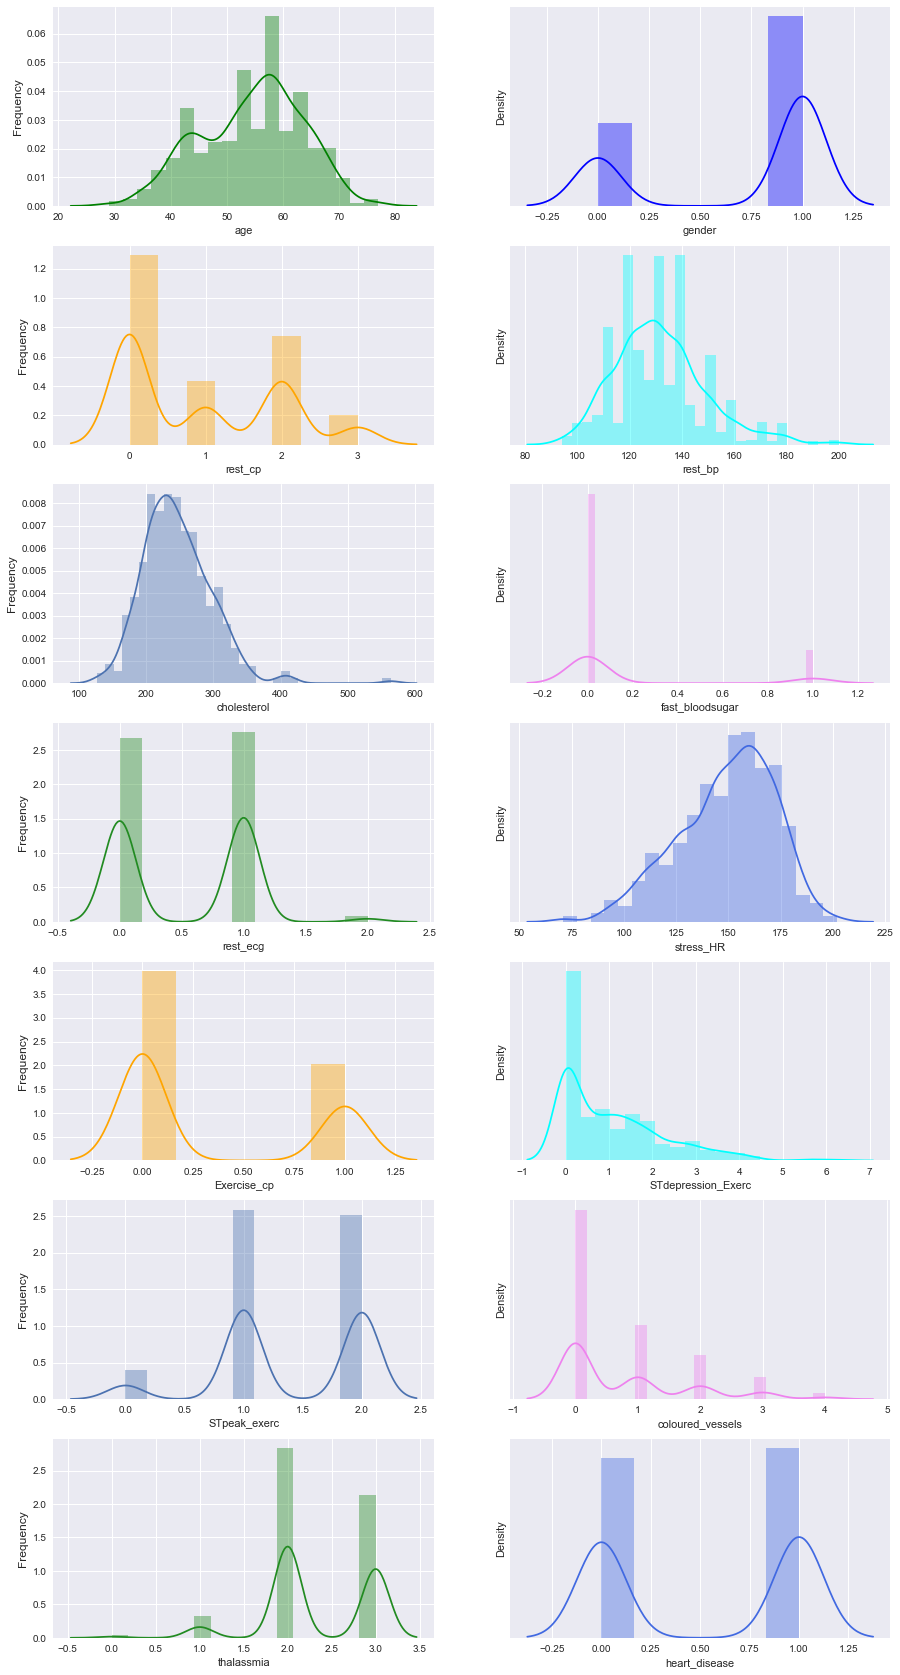

In [283]:
plt.figure(figsize=(15,30))

plt.subplot(7,2,1)
sns.distplot(df['age'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,2)
sns.distplot(df['gender'], color='blue')
plt.yticks([])

plt.subplot(7,2,3)
sns.distplot(df['rest_cp'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,4)
sns.distplot(df['rest_bp'], color='cyan')
plt.yticks([])

plt.subplot(7,2,5)
sns.distplot(df['cholesterol'])
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,6)
sns.distplot(df['fast_bloodsugar'], color='violet')
plt.yticks([])

plt.subplot(7,2,7)
sns.distplot(df['rest_ecg'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,8)
sns.distplot(df['stress_HR'], color='royalblue')
plt.yticks([])




plt.subplot(7,2,9)
sns.distplot(df['Exercise_cp'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,10)
sns.distplot(df['STdepression_Exerc'], color='cyan')
plt.yticks([])

plt.subplot(7,2,11)
sns.distplot(df['STpeak_exerc'])
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,12)
sns.distplot(df['coloured_vessels'], color='violet')
plt.yticks([])

plt.subplot(7,2,13)
sns.distplot(df['thalassmia'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(7,2,14)
sns.distplot(df['heart_disease'], color='royalblue')
plt.yticks([])


plt.show()

In [284]:
df.heart_disease.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

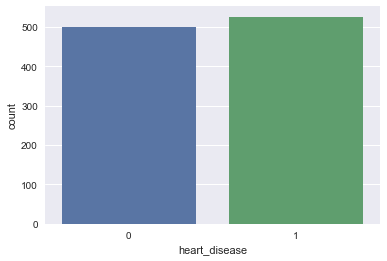

In [285]:
sns.countplot(x="heart_disease", data=df)

In [286]:
# Yes there are 523 heart disease and 495 No heart disease patients.
# It indicate if a person visit to a hospital just with a symptoms,  50% chances are there that he is a patient of heart disease.
# overall its a balance dataset .

In [287]:
df["rest_cp"].value_counts()

0    497
2    284
1    167
3     77
Name: rest_cp, dtype: int64


‘rest_cp’……..Chest pain type

0 = Typical angina

1 = Atypical angina

2 = Non-anginal pain

3 = Asymptomatic




In [288]:
df["fast_bloodsugar"].value_counts()

0    872
1    153
Name: fast_bloodsugar, dtype: int64


‘fast_bloodsugar’…….(Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


In [289]:
#‘rest_bp’..Resting blood pressure (in mm Hg on admission to the hospital)

In [290]:
df["rest_ecg"].value_counts()

1    513
0    497
2     15
Name: rest_ecg, dtype: int64

‘rest_ecg’…Resting electrocardiographic results

0 = Normal

1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

2= Showing probable or definite left ventricular hypertrophy by Estes’ criteria


In [291]:
#‘stress_HR’…Maximum heart rate achieved during stress test

In [292]:
df["Exercise_cp"].value_counts()

0    680
1    345
Name: Exercise_cp, dtype: int64

In [293]:
#‘Exercise_cp’…..Exercise induced angina (1 = yes; 0 = no)

In [294]:
#‘STdepression_Exerc’…ST depression induced by exercise relative to rest

In [295]:
df["STpeak_exerc"].value_counts()

1    482
2    469
0     74
Name: STpeak_exerc, dtype: int64

In [296]:
#‘STpeak_exerc’…..Slope of the peak exercise ST segment
#………… 0 = upsloping; 1 = flat; 2 = downsloping

In [297]:
df["coloured_vessels"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: coloured_vessels, dtype: int64

In [298]:
#‘coloured_vessels’………Number of major vessels (0-3) found colored by flourosopy measurement

In [299]:
df["thalassmia"].value_counts()

2    544
3    410
1     64
0      7
Name: thalassmia, dtype: int64

In [300]:
#‘thalassmia’…….0 = null;1=normal; 2 = fixed defect; 3 = reversable defect



In [301]:
# DELETING THE ROWS WHERE thalassmia==0

df = df[(df['thalassmia'] > 0)]

In [302]:
df["thalassmia"].value_counts()

2    544
3    410
1     64
Name: thalassmia, dtype: int64

In [303]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.449902,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.215128,0.334971,1.074951,1.385069,0.759332,2.339882,0.513752
std,9.101090,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,22.990312,0.472212,1.177640,0.618506,1.032432,0.591982,0.500057
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


[Text(0.5, 0, 'gender of patients')]

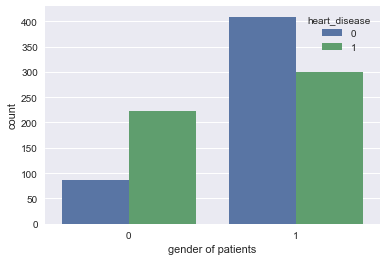

In [304]:
gender_count=sns.countplot(x="gender", data=df,hue="heart_disease")
gender_count.set(xlabel="gender of patients")

In [305]:
# female mostly has less chances of heart disease as compare to male.

In [306]:
"""No. of Males =709
No. of female=309"""

'No. of Males =709\nNo. of female=309'

[Text(0, 0.5, 'Percent')]

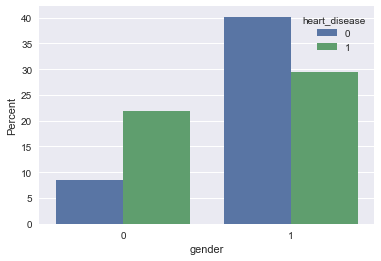

In [307]:
ax = sns.barplot(x="gender", y="heart_disease", data=df,hue="heart_disease", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

In [308]:
# condition (target) : 0 = no disease, 1 = disease
#sex  (0 = female, 1 = male )

CP:- chest pain type (4 values) 

    – Value 0: typical angina
    
    – Value 1: atypical angina
    
    – Value 2: non-anginal pain 
    
    – Value 3: asymptomatic"""

"""Typical angina means that the history of the patient is classical and chance of having coronary artery blockages is high. 

Atypical angina means that the symptoms have some features suggesting blockages and other symptoms which are not specific and 
chance of blockages is lower.

"silent" (asymptomatic) myocardial ischemia is the most common manifestation of coronary heart disease (CHD)

<AxesSubplot:xlabel='rest_cp', ylabel='count'>

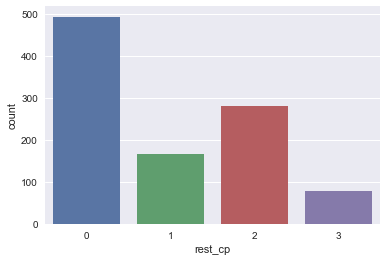

In [309]:
sns.countplot(x="rest_cp", data=df)

[Text(0, 0.5, 'Percent')]

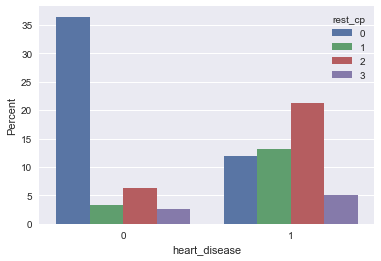

In [310]:
ax = sns.barplot(x="heart_disease", y="rest_cp", data=df,hue="rest_cp", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

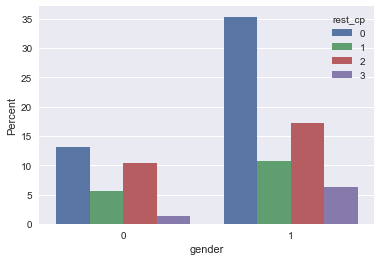

In [311]:
ax = sns.barplot(x="gender", y="rest_cp", data=df,hue="rest_cp", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

In [312]:
df["gender"].value_counts()

1    709
0    309
Name: gender, dtype: int64

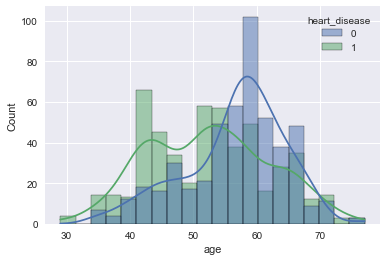

In [313]:
sns.histplot(data=df,x="age",hue="heart_disease",bins=20,kde=True)
plt.show()

In [314]:
# condition (target) : 0 = no disease, 1 = disease
# We can say ; Cardiovascular diseases maximum risk at age 40-65 age

#sex  (0 = female, 1 = male )

In [315]:
# condition (target) : 0 = no disease, 1 = disease
#cp (0 = , 1 = male,2=,3= )

Text(0.5, 1.0, 'thal Type v/s target\n')

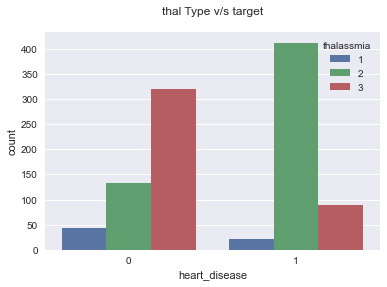

In [316]:
sns.countplot(data= df, x='heart_disease',hue='thalassmia')
plt.title('thal Type v/s target\n')

In [317]:
# condition (target) : 0 = no disease, 1 = disease


Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


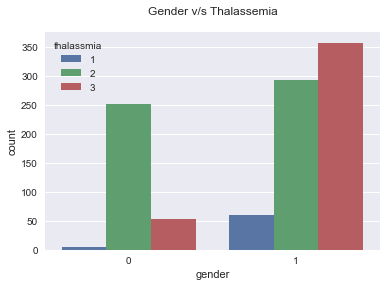

In [318]:
sns.countplot(data= df, x='gender',hue='thalassmia')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, 
with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left 
ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and 
abnormal heart rhythms can be associated with severe thalassemia.

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

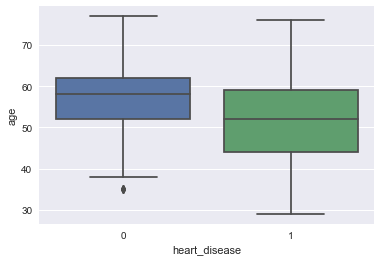

In [319]:
sns.boxplot(data=df,x='heart_disease',y='age')

From the positive disease , we can analyze that our 25th Percentile is 44 year i.e  which means 25% of the patient age  is less than 44 year.

50th percentile is 50 year,50% of heart disease patients lies below 50 year.

75th Percentile value is 58 meaning 75% of data lies below 58.


In [320]:
# MISSING VALUES AND EDA PART

In [321]:
# CHECKING FOR MISSING VALUES

In [322]:
df.isnull().sum()

age                   0
gender                0
rest_cp               0
rest_bp               0
cholesterol           0
fast_bloodsugar       0
rest_ecg              0
stress_HR             0
Exercise_cp           0
STdepression_Exerc    0
STpeak_exerc          0
coloured_vessels      0
thalassmia            0
heart_disease         0
dtype: int64

There is no missing values If there were
null values we needed to drop/eliminate or apply mean, median mode as per requirements to ensure an
higher performance.

# impute missing values in item weight by mean/median

df["age"].fillna(df["age"].mean(),inplace=True)

df["chol"].fillna(df["chol"].median(),inplace=True)

 # impute outlet size in training data by mode

df["chol"].fillna(df["chol"].mode()[0]],inplace=True)




In [323]:
df.heart_disease.value_counts()


1    523
0    495
Name: heart_disease, dtype: int64

In [324]:
#clearly we have a balance dataset.
# 2* minority class>majority class.
# Although it is a clinical dataset , incase of IMBALANCE situation , it is advisable not to balance it because it is sensitive datas.

In [325]:
df.nunique()

age                    41
gender                  2
rest_cp                 4
rest_bp                49
cholesterol           152
fast_bloodsugar         2
rest_ecg                3
stress_HR              91
Exercise_cp             2
STdepression_Exerc     40
STpeak_exerc            3
coloured_vessels        5
thalassmia              3
heart_disease           2
dtype: int64

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1018 non-null   int64  
 1   gender              1018 non-null   int64  
 2   rest_cp             1018 non-null   int64  
 3   rest_bp             1018 non-null   int64  
 4   cholesterol         1018 non-null   int64  
 5   fast_bloodsugar     1018 non-null   int64  
 6   rest_ecg            1018 non-null   int64  
 7   stress_HR           1018 non-null   int64  
 8   Exercise_cp         1018 non-null   int64  
 9   STdepression_Exerc  1018 non-null   float64
 10  STpeak_exerc        1018 non-null   int64  
 11  coloured_vessels    1018 non-null   int64  
 12  thalassmia          1018 non-null   int64  
 13  heart_disease       1018 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 151.6 KB


In [327]:
#All datas are in Int or Float type typecasting not required.


# NEXT STEP :- THE PREPROCESSING EDA PART 

# OUTLIER TRETMENT  

In [328]:
# ALTHOUGH ITS A CLASSIFICATION PROBLEM OUTLIER TREATMENT IS NOT REQUIRED IN CLASSIFICATION.
# OUTLIER  PLAY HIGH IMPACT IN REGRESSION PROBLEM .#It is not good idea to remove the data by outlier treatment ,
#its better to do square root , or log transformation in place of removing outliers.
# instead of doing outlier and then doing feature scalling , the good idea is to feature scalling directly.
#because after feature scalling many outliers aumatically come in to the range.

# since we are using random forest Bagging method feature scalling is also not required.(no standardization impact)

<AxesSubplot:>

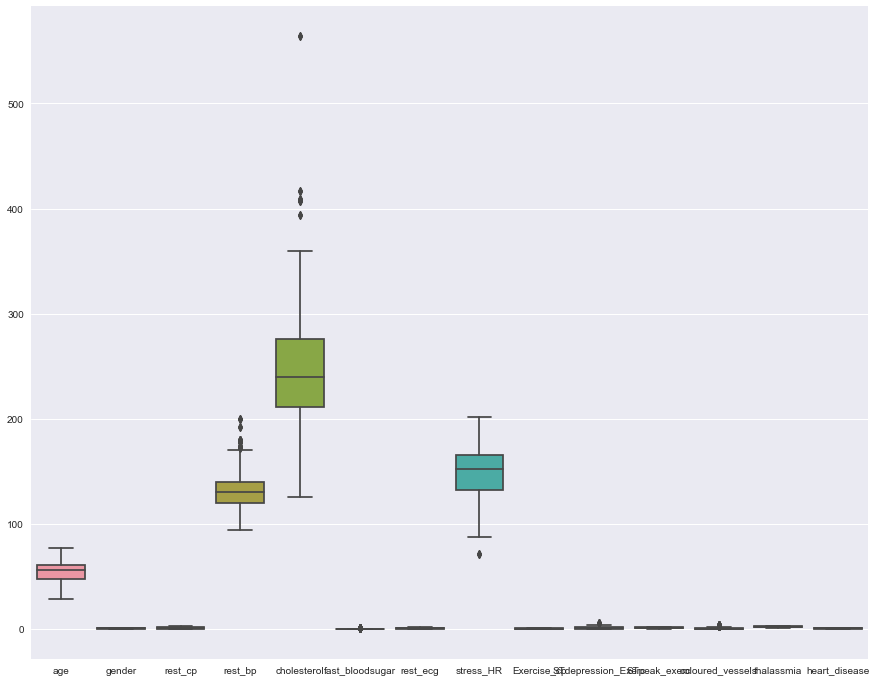

In [329]:
# checking outliners in boxplot

plt.figure(figsize=(15,12)) # Set plot dimensions
sns.boxplot(data=df)

#Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) 
#and below the 1st quartile (Q1)

Q1=df.quantile(0.25)

Q3=df.quantile(0.75)

IQR=Q3-Q1

Pos_Outlier=Q3+1.5*IQR

Neg_Outlier=Q1-1.5*IQR

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

~ (tilda symbol , use for compare)
 | (pipe symbol), use for OR)

it will remove all independent variable outlier which is less than Negative outlier and more than positive outlier.

using log approach for outlier treatment or square root approach or cuberoot approach for outlier treatment.

assume we are applying on index first column.

df.iloc[:,1]=np.log10(df.iloc[:,1])

df.iloc[:,1]=np.sqrt(df.iloc[:,1])




In [330]:
#Splitting the data into independent variable and dependent variable
# the target variable is heart_ disease

In [331]:
X=df.drop(["heart_disease"],axis=1)
Y=df["heart_disease"]

In [332]:
#Feature scaling is one of the most important data preprocessing step in machine learning. 
#Algorithms that compute the distance between the features are biased towards numerically larger values 
#if the data is not scaled.
#Tree-based algorithms are fairly insensitive to the scale of the features.
# Normalization is useful when there are no outliers as it cannot cope up with them. otherwise its better to opt standarization.

In [333]:
X.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.449902,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.215128,0.334971,1.074951,1.385069,0.759332,2.339882
std,9.101090,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,22.990312,0.472212,1.177640,0.618506,1.032432,0.591982
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [334]:
# Feature scaling standarization to bring all the values 0 and -3.

In [335]:
from sklearn.preprocessing import StandardScaler
scaljob=StandardScaler()
X_scaled=scaljob.fit_transform(X)
X_scaled

array([[-0.26932004,  0.66017051, -0.91611061, ...,  0.99470897,
         1.20228531,  1.11564509],
       [-0.15938909,  0.66017051, -0.91611061, ..., -2.24047867,
        -0.73584049,  1.11564509],
       [ 1.70943717,  0.66017051, -0.91611061, ..., -2.24047867,
        -0.73584049,  1.11564509],
       ...,
       [-0.81897483,  0.66017051, -0.91611061, ..., -0.62288485,
         0.23322241, -0.57442441],
       [-0.48918196, -1.51476017, -0.91611061, ...,  0.99470897,
        -0.73584049, -0.57442441],
       [-0.04945813,  0.66017051, -0.91611061, ..., -0.62288485,
         0.23322241,  1.11564509]])

In [336]:
# we are getting the array value we sould change it in DATAFRAME 
X_scaled_DF=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
# HERE WE ARE USING THE INDEX  and COLUMN NAME OF Newdata
X_scaled_DF

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,-0.269320,0.660171,-0.916111,-0.377813,-0.663171,-0.414079,0.891449,0.817479,-0.709713,-0.063676,0.994709,1.202285,1.115645
1,-0.159389,0.660171,-0.916111,0.476125,-0.837417,2.414998,-1.003112,0.251746,1.409020,1.720428,-2.240479,-0.735840,1.115645
2,1.709437,0.660171,-0.916111,0.760770,-1.398877,-0.414079,0.891449,-1.053793,1.409020,1.295641,-2.240479,-0.735840,1.115645
3,0.720059,0.660171,-0.916111,0.931558,-0.837417,-0.414079,0.891449,0.512854,-0.709713,-0.913250,0.994709,0.233222,1.115645
4,0.829990,-1.514760,-0.916111,0.362266,0.924407,2.414998,0.891449,-1.880634,-0.709713,0.700940,-0.622885,2.171348,-0.574424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.500197,0.660171,0.055348,0.476125,-0.488924,-0.414079,0.891449,0.643407,1.409020,-0.913250,0.994709,-0.735840,-0.574424
1021,0.610128,0.660171,-0.916111,-0.377813,0.227422,-0.414079,-1.003112,-0.357506,1.409020,1.465556,-0.622885,0.233222,1.115645
1022,-0.818975,0.660171,-0.916111,-1.231750,0.556554,-0.414079,-1.003112,-1.358419,1.409020,-0.063676,-0.622885,0.233222,-0.574424
1023,-0.489182,-1.514760,-0.916111,-1.231750,0.149979,-0.414079,-1.003112,0.425818,-0.709713,-0.913250,0.994709,-0.735840,-0.574424


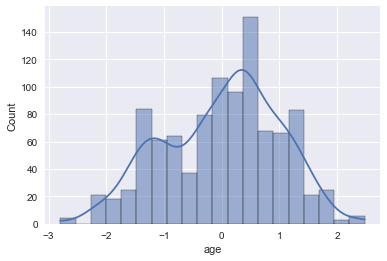

In [337]:
sns.histplot(data=X_scaled_DF,x="age",bins=20,kde=True)
plt.show()

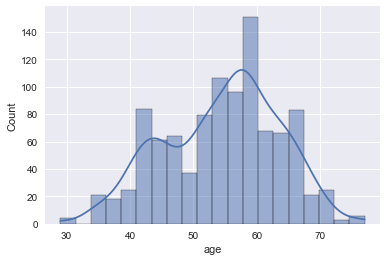

In [338]:
sns.histplot(data=df,x="age",bins=20,kde=True)
plt.show()

In [339]:
X_scaled_DF.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
count,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03,1.018000e+03
mean,2.703578e-16,-2.717756e-16,2.353498e-16,-4.524868e-16,-2.469101e-16,5.452962e-19,2.799551e-16,-2.715575e-16,-2.028502e-16,1.216010e-17,-1.592265e-17,-2.151466e-16,2.573798e-17
std,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00
min,-2.797732e+00,-1.514760e+00,-9.161106e-01,-2.142616e+00,-2.328191e+00,-4.140790e-01,-1.003112e+00,-3.403763e+00,-7.097132e-01,-9.132499e-01,-2.240479e+00,-7.358405e-01,-2.264494e+00
25%,-7.090439e-01,-1.514760e+00,-9.161106e-01,-6.624585e-01,-6.825313e-01,-4.140790e-01,-1.003112e+00,-7.491673e-01,-7.097132e-01,-9.132499e-01,-6.228849e-01,-7.358405e-01,-5.744244e-01
50%,1.704038e-01,6.601705e-01,5.534835e-02,-9.316696e-02,-1.210710e-01,-4.140790e-01,8.914486e-01,1.211920e-01,-7.097132e-01,-2.335910e-01,-6.228849e-01,-7.358405e-01,-5.744244e-01
75%,7.200586e-01,6.601705e-01,1.026807e+00,4.761246e-01,5.710742e-01,-4.140790e-01,8.914486e-01,7.304434e-01,1.409020e+00,6.159826e-01,9.947090e-01,2.332224e-01,1.115645e+00
max,2.478954e+00,6.601705e-01,1.998266e+00,3.891874e+00,6.151797e+00,2.414998e+00,2.786010e+00,2.297090e+00,1.409020e+00,4.354106e+00,9.947090e-01,3.140411e+00,1.115645e+00


# multicollinearity problems

Actually, we are interested in classification, No need to get rid of collinear variables. 

Multicollinearity mostly occurs in a regression model when two or more independent variable are highly correlated to each other.

Multicollinearity is a statistical concept where several independent variables in a model are correlated. 

Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. 

Multicollinearity among independent variables will result in less reliable statistical inferences.

In [340]:
#X_scaled.corr() # it fetch error due to not being dataframe shape

In [341]:
X_scaled_DF.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.104040,-0.072689,0.270775,0.219135,0.124940,-0.132470,-0.392645,0.089593,0.207961,-0.169502,0.270848,0.069961
gender,-0.104040,1.000000,-0.034464,-0.079704,-0.199939,0.019504,-0.062310,-0.056392,0.133562,0.081243,-0.020783,0.111042,0.202289
rest_cp,-0.072689,-0.034464,1.000000,0.038187,-0.083220,0.090412,0.050097,0.313559,-0.397442,-0.172972,0.127094,-0.177516,-0.174645
rest_bp,0.270775,-0.079704,0.038187,1.000000,0.127212,0.185604,-0.124076,-0.039523,0.062197,0.187088,-0.120631,0.103722,0.056779
cholesterol,0.219135,-0.199939,-0.083220,0.127212,1.000000,0.034286,-0.146994,-0.022301,0.071103,0.063311,-0.014593,0.070920,0.086248
fast_bloodsugar,0.124940,0.019504,0.090412,0.185604,0.034286,1.000000,-0.115258,-0.014156,0.035855,0.010465,-0.055631,0.145048,-0.012411
rest_ecg,-0.132470,-0.062310,0.050097,-0.124076,-0.146994,-0.115258,1.000000,0.044386,-0.073141,-0.052807,0.091662,-0.078055,-0.019490
stress_HR,-0.392645,-0.056392,0.313559,-0.039523,-0.022301,-0.014156,0.044386,1.000000,-0.386687,-0.352408,0.402152,-0.208882,-0.114906
Exercise_cp,0.089593,0.133562,-0.397442,0.062197,0.071103,0.035855,-0.073141,-0.386687,1.000000,0.311099,-0.263637,0.111065,0.221954
STdepression_Exerc,0.207961,0.081243,-0.172972,0.187088,0.063311,0.010465,-0.052807,-0.352408,0.311099,1.000000,-0.574654,0.220350,0.201930


<AxesSubplot:>

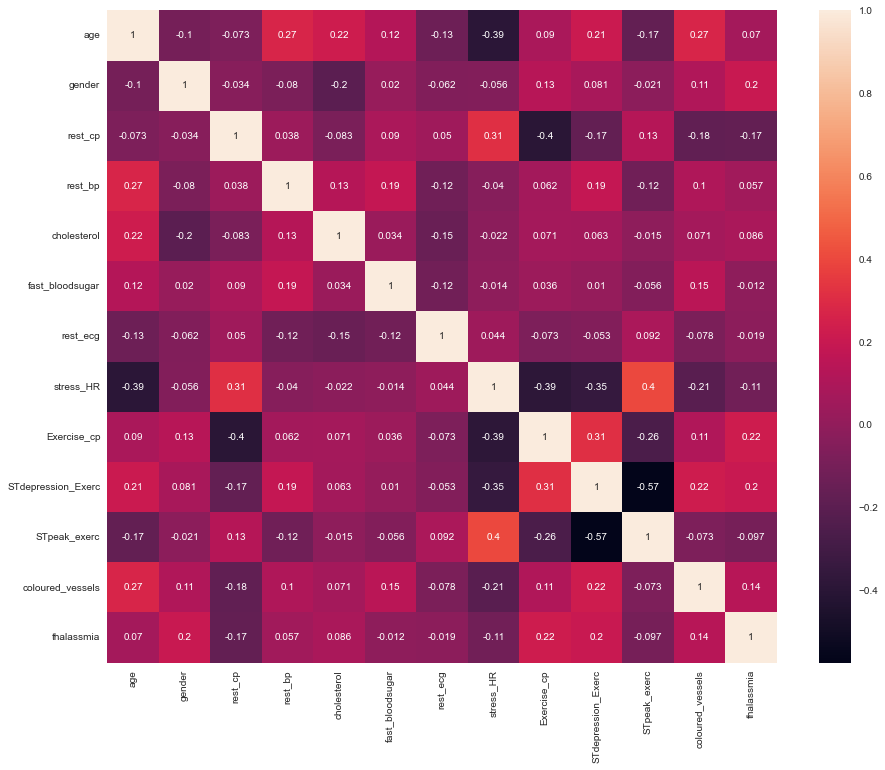

In [342]:
# Although in classification problem , there is no impact of multi-collinearity in case of classificataion problem if there are any two values are same , it is called Multi collinearity. than we can drop any of that equal Ind Variable.
#Same data we can plot in heatmap for more better understanding.
plt.figure(figsize=(15,12))

sns.heatmap(X_scaled_DF.corr(),annot=True)

In [343]:
# although there is no Multicolliniearilty ,if a value more than 0.8 ( specific to Medical and clinical sector data it consider as multicollinearity).

In [344]:
#SPLITTING THE DATA IN TRAINING AND TEST

from sklearn.model_selection import train_test_split


In [345]:
print(X.shape)
print(Y.shape)

(1018, 13)
(1018,)


In [346]:
#unscaled datas
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 13)
(306, 13)
(712,)
(306,)


In [347]:
#scaled datas
X_train1, X_test1,Y_train1,Y_test1=train_test_split(X_scaled_DF,Y,train_size=0.70,random_state=101)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(712, 13)
(306, 13)
(712,)
(306,)


# To study this data set we implemented various models, applying the models

# Buidling KNN MODEL

In [348]:
 """The k-nearest neighbours algorithm is one of the transperent 
machine learning algorithms. It is simply based on the idea that 
“objects that are ‘near’ each other will also have similar 
characteristics. Thus if you know the characteristic features of 
one of the objects, you can also predict it for its nearest 
neighbour.”
 
 It’s used in many different areas, such as Medical, clinical,handwriting detection, image recognition, and video recognition. 
    KNN is most useful when labeled data is too expensive or impossible to obtain.
   KNN algorithm is one of the simplest forms and is widely used in classification tasks in research because of
   easy-to-understand design """


    
from sklearn.neighbors import KNeighborsClassifier
knn5=KNeighborsClassifier(n_neighbors=5)
# we selected random value n_neighbors=5, 
#which is the k value. 
#pl. note at present we are not sure what should be the perfect k value.
# lets try with k=5

knn5.fit(X_train,Y_train)

KNeighborsClassifier()

In [349]:
Y_pred_KNN_train=knn5.predict(X_train)
Y_pred_KNN_test=knn5.predict(X_test)

In [350]:
# prediction is done 
# now we have to check the accuracy part

from sklearn .metrics import classification_report,confusion_matrix,accuracy_score

In [351]:
print("KNN training accuracy", accuracy_score(Y_train,Y_pred_KNN_train))
print("######"*5)
print("KNN testing accuracy", accuracy_score(Y_test,Y_pred_KNN_test))

KNN training accuracy 0.8792134831460674
##############################
KNN testing accuracy 0.7058823529411765



ACCURACY OF UNSCALLED DATASET WHEN K=5(random selection)

KNN training accuracy 0.8806179775280899

##############################

KNN testing accuracy 0.7058823529411765


In [352]:
#WORKING WITH SCALLED DATASET

In [353]:
knn_S_5=KNeighborsClassifier(n_neighbors=5) 
knn_S_5.fit(X_train1,Y_train1)


Y_pred_KNN_train1=knn_S_5.predict(X_train1)
Y_pred_KNN_test1=knn_S_5.predict(X_test1)

In [354]:
print("KNN training accuracy", accuracy_score(Y_train1,Y_pred_KNN_train1))
print("######"*5)
print("KNN testing accuracy", accuracy_score(Y_test1,Y_pred_KNN_test1))

KNN training accuracy 0.9508426966292135
##############################
KNN testing accuracy 0.8660130718954249


# overfitting underfitting


ACCURACY OF SCALLED DATASET WHEN K=5

KNN training accuracy 0.9508426966292135

##############################

KNN testing accuracy 0.8660130718954249


""" overfitting--underfitting .

It seems to be overfitting although difference in training and test is acceptable up to 10% difference"""

In [355]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

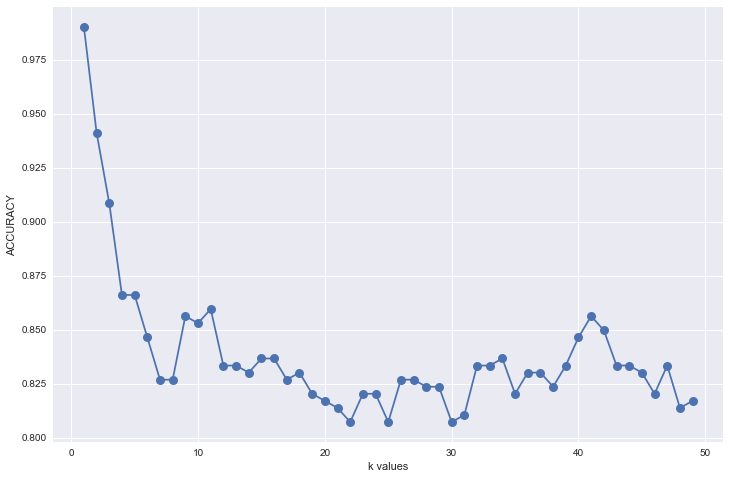

In [356]:
# find the more effective value of n_neighbors parameter:
accuracy_K = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, Y_train1)
    Y_pred = knn.predict(X_test1)
    accuracy =accuracy_score(Y_test1, Y_pred)
    accuracy_K.append(accuracy)
   
plt.figure(figsize=(12,8))
plt.xlabel("k values")
plt.ylabel("ACCURACY")
plt.plot(range(1,50),accuracy_K, marker='o', markersize=9)

In [357]:
# we can try different k values 5 or 7
knn_S_25=KNeighborsClassifier(n_neighbors=5) 
knn_S_25.fit(X_train1,Y_train1)


Y_pred_KNN_train1=knn_S_25.predict(X_train1)
Y_pred_KNN_test1=knn_S_25.predict(X_test1)

In [358]:
print("KNN training accuracy", accuracy_score(Y_train1,Y_pred_KNN_train1))
print("######"*5)
print("KNN testing accuracy", accuracy_score(Y_test1,Y_pred_KNN_test1))

KNN training accuracy 0.9508426966292135
##############################
KNN testing accuracy 0.8660130718954249


In [359]:
"""
#ACCURACY OF SCALED DATASET.
WHEN K=5
KNN training accuracy 0.9509550561797753
##############################
KNN testing accuracy 0.8633333333333334
"""
# K should be odd no. say 25 , 12 is + class , 13 is - nve class final prediction is +ve class.
# if k is even say 24 , it may bepossible both class + ve and =ve are in equal no.(12) than difficult to decide the final prediction.

'\n#ACCURACY OF SCALED DATASET.\nWHEN K=5\nKNN training accuracy 0.9509550561797753\n##############################\nKNN testing accuracy 0.8633333333333334\n'

# CROSS VALIDATION CV

In [360]:
from sklearn.model_selection import cross_val_score

In [361]:
accuracy_training=cross_val_score(knn_S_25,X_train1,Y_train1,cv=20)
accuracy_testing=cross_val_score(knn_S_25,X_test1,Y_test1,cv=15)
print(accuracy_training)
#print(accuracy_testing)

[0.91666667 0.86111111 0.86111111 0.86111111 0.80555556 0.88888889
 0.77777778 0.80555556 0.86111111 0.88888889 0.91666667 0.88888889
 0.77142857 0.74285714 0.77142857 0.85714286 0.82857143 0.74285714
 0.82857143 0.77142857]


In [362]:
print("accuracy training",accuracy_training[7] )
print("accuracy testing",accuracy_testing[0] )

accuracy training 0.8055555555555556
accuracy testing 0.9523809523809523


MOSTLY USED IN KAGGLE COMPETITION TO INCREASE THE ACCURACY it is one kind of hacking technique.

Not appreciated in sensitive and high resik prediction industry like medical , airlines,railwaysetc..

The three steps involved in cross-validation are as follows :
    
Reserve some portion of sample data-set.

Using the rest data-set train the model.

Test the model using the reserve portion of the data-set.

In [363]:
"""Accuracy is the standard metric to go for to evaluate a classification machine learning model . But We can not only rely on 
Accuracy all the time as in some cases accuracy gives us a wrong interpretation of the quality of the model,
for example in the case when our dataset is imbalanced.
Another case of not using Accuracy is when we are dealing with a domain-specific project or when our company wants a
particular result from the model.

Domain-Specific case
 
Example 1: SHARE MARKET PREDICTION    
Positive means bull effect , go up. Negative means bear effect go down (or may consider crash) .
Stock Market Prediction, our main aim should be to reduce the outcomes where the
model was predicting as not a market crash whereas it was a market crash.
Imagine a situation where our model has wrongly predicted that the market will not crash and instead it crashed, the people
have to go through a lot of losses in this case.
The measure which takes into account this problem is FN and therefore Recall. So we need to focus on REDUCING THE VALUE OF
FN and increasing the value of Recall.

Example 2: Medical diagnosis , lab report.
Positive means that whatever the test was looking for was found. Negative means that whatever the test was looking for was 
not found. There are also false-positive results in which a disease is detected even if it is not there and false-negative 
results in which a test fails to detect the disease or condition.
In most medical cases, such as cancer prediction or any disease prediction we try to reduce the value of FP.

Example 3: Spam Detection
Finding bugs in a software during SDLC is good news its POSITIVE.
Detecting spam in email is positive.
In the case of Email Spam detection, if an email is predicted as a scam but is not actually a scam then it can cause problems to
the user.
In this case, we need to focus on reducing the value of FP (i.e when the mail is falsely predicted as spam) and as a result,
increasing the value of Precision.
Any result we further need to work and investigate , rectify ,give solution(IN MEDICAL DOMAIN) 
OR filtered it (in case of bug ,spam) is taken as POSITIVE.

In some cases of imbalanced data problems, both Precision and Recall are important so we consider the F1 score as an
evaluation metric.

There is another concept of the AUC ROC curve for evaluation of a classification model, which is one of the most important
metrics also. """

'Accuracy is the standard metric to go for to evaluate a classification machine learning model . But We can not only rely on \nAccuracy all the time as in some cases accuracy gives us a wrong interpretation of the quality of the model,\nfor example in the case when our dataset is imbalanced.\nAnother case of not using Accuracy is when we are dealing with a domain-specific project or when our company wants a\nparticular result from the model.\n\nDomain-Specific case\n \nExample 1: SHARE MARKET PREDICTION    \nPositive means bull effect , go up. Negative means bear effect go down (or may consider crash) .\nStock Market Prediction, our main aim should be to reduce the outcomes where the\nmodel was predicting as not a market crash whereas it was a market crash.\nImagine a situation where our model has wrongly predicted that the market will not crash and instead it crashed, the people\nhave to go through a lot of losses in this case.\nThe measure which takes into account this problem is FN 

In [364]:
# confusion matrix
"""Confusion matrix got its name from the fact that it makes it easier to identify if the classification model is getting 
confused or not. For a classification model, confusion can result in misidentifying the data, which further results in 
performance degradation."""

"""When a Machine Learning model is built various evaluation metrics are used to check the quality or the performance of a
model. For classification models, metrics such as Accuracy, Confusion Matrix, Classification report (i.e Precision, Recall, F1
score), and AUC-ROC curve are used"""


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn_conf_mat=confusion_matrix(Y_test1,Y_pred_KNN_test1)

print(confusion_matrix(Y_test1,Y_pred_KNN_test1))
#knn_conf_mat=confusion_matrix(Y_pred_KNN_test1,Y_test1)
#print(confusion_matrix(Y_pred_KNN_test1,Y_test1))




[[132  16]
 [ 25 133]]


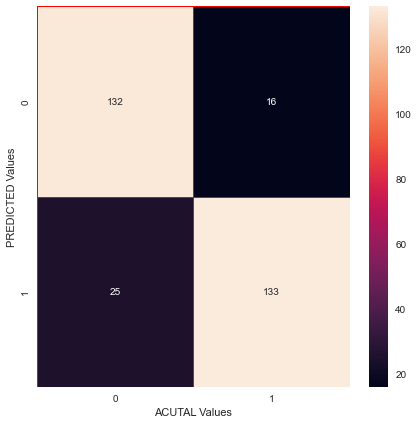

In [365]:
#Visualization Confusion Matrix
plt.subplots(figsize=(7,7))
sns.heatmap(knn_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X)
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [366]:
"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =132,  False Positive(TYPE I ERROR) =16,FN: False Negative(TYPE II ERROR)= 25, True Negative : 133
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [367]:
"""Classification Report Basically, it is an extended version of the confusion matrix. 
There are measures other than the confusion matrix which can help achieve better understanding and analysis of 
our model and its performance."""

'Classification Report Basically, it is an extended version of the confusion matrix. \nThere are measures other than the confusion matrix which can help achieve better understanding and analysis of \nour model and its performance.'

In [368]:
print("## CLASSIFICATION REPORT KNN TRAINING MODEL ######")
print(classification_report(Y_train1,Y_pred_KNN_train1))
print("## CLASSIFICATION REPORT KNN TESTING MODEL  ######")
print(classification_report(Y_test1,Y_pred_KNN_test1))

## CLASSIFICATION REPORT KNN TRAINING MODEL ######
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.97      0.93      0.95       365

    accuracy                           0.95       712
   macro avg       0.95      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712

## CLASSIFICATION REPORT KNN TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       148
           1       0.89      0.84      0.87       158

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306



In [369]:
print(accuracy_score(Y_test1,Y_pred_KNN_test1))

0.8660130718954249


In [370]:
"""## condition (target) : 0 = no disease, 1 = disease

#PRECISION REPORT

Precision is the fraction of true positive examples
among the examples that the model classified as
positive. In other words, the number of true positives
divided by the number of false positives plus true
positives.

# In training Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct 
#and 99 % of presence of heart disease was predicted correct.

#In testing Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct 
#and 92 % of presence of heart disease was predicted correct.

# RECALL
Recall, also known as sensitivity, is the fraction of
examples classified as positive, among the total
number of positive examples. In other words, the
number of true positives divided by the number of true
positives plus false negatives.

# F SCORE

The F-score, also called the F1-score, is a measure of a model’s accuracy
on a dataset. It is used to evaluate binary classification systems, which
classify examples into ‘positive’ or ‘negative’.
The formula for the standard F1-score is the harmonic mean of the
precision and recall

 We consider a convolutional neural network in
the medical domain, which evaluates mammograms and detects
tumors. We consider it much worse to miss a tumor than to give a false
alarm to a nonexistent tumor.

# SUPPORT no. of examples as 0 and 1.

#macro-avg is mean average of precision/recall/F1 of all classes. 
 while weighed avg is the total number TP (true positive of all classes)/total number of objects in all classes. """
 

'## condition (target) : 0 = no disease, 1 = disease\n\n#PRECISION REPORT\n\nPrecision is the fraction of true positive examples\namong the examples that the model classified as\npositive. In other words, the number of true positives\ndivided by the number of false positives plus true\npositives.\n\n# In training Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct \n#and 99 % of presence of heart disease was predicted correct.\n\n#In testing Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct \n#and 92 % of presence of heart disease was predicted correct.\n\n# RECALL\nRecall, also known as sensitivity, is the fraction of\nexamples classified as positive, among the total\nnumber of positive examples. In other words, the\nnumber of true positives divided by the number of true\npositives plus false negatives.\n\n# F SCORE\n\nThe F-score, also called the

# KNN ROC AUC PREDICTION

In [371]:
#ROC is a probability curve and AUC represents the degree or measure of separability.
"""The classification done internally on the based on thershold value... similar to DEEP Leaning different activation function.
Assuming a threshold of 0.5 for a model classifier, than the value 0.6,0.7,0.8,0.9 consider as 1. it is misleading.
Assuming a threshold of 0.78 for a model classifier, than the value 0.6,0.7 will not consider as  consider as 1."""

"""
TPR (True Positive Rate)
FPR (False Positive Rate)

To explain TPR and FPR, Lets take the example of justice system. Naturally, any justice system only wants to punish people 
guilty of crimes and doesn’t want to charge an innocent person. 

consider zero for (innocent) or a one for (guilty).

In this case, the TPR is the proportion of guilty criminals our model was able to capture. 
Thus, the numerator is guilty criminals captured, and the denominator is total criminals. 
This ratio is also known as recall or sensitivity.

TPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)

The FPR is the proportion of innocents we incorrectly predicted as criminal (false positives) 
divided by the total number of actual innocent citizens. Thus, the numerator is innocents captured, and the denominator is 
total innocents.

FPR (False Positive Rate) = FP/(TN+FP)

Usually, we would want high TPR (because we want to capture all the criminals) and low FPR (because we don’t want to 
capture innocent people).
"""


'\nTPR (True Positive Rate)\nFPR (False Positive Rate)\n\nTo explain TPR and FPR, Lets take the example of justice system. Naturally, any justice system only wants to punish people \nguilty of crimes and doesn’t want to charge an innocent person. \n\nconsider zero for (innocent) or a one for (guilty).\n\nIn this case, the TPR is the proportion of guilty criminals our model was able to capture. \nThus, the numerator is guilty criminals captured, and the denominator is total criminals. \nThis ratio is also known as recall or sensitivity.\n\nTPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)\n\nThe FPR is the proportion of innocents we incorrectly predicted as criminal (false positives) \ndivided by the total number of actual innocent citizens. Thus, the numerator is innocents captured, and the denominator is \ntotal innocents.\n\nFPR (False Positive Rate) = FP/(TN+FP)\n\nUsually, we would want high TPR (because we want to capture all the criminals) and low FPR (because we don’t wan

In [372]:

"""
“Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC). 

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the 
Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives
as Positives, and all Positives as Negatives.

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. 
Meaning either the classifier is predicting random class or constant class for all the data points.
So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes."""


'\n“Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC). \n\nThe higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.\nWhen AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the \nNegative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives\nas Positives, and all Positives as Negatives.\n\nWhen AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. \nMeaning either the classifier is predicting random class or constant class for all the data points.\nSo, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.'

In [373]:
from sklearn.metrics import roc_auc_score



# predict probabilities
probability_prediction_positive = knn.predict_proba(X_test1)[:,1]

# auc scores
auc_score1 = roc_auc_score(Y_test1, probability_prediction_positive)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test1, probability_prediction_positive, pos_label=1)




print("AUC SCORE:",auc_score1)
#print("#######"*5)
#print("value of FPR", fpr1)
#print("#######"*5)
#print("Values of TPR",tpr1)
#print("#######"*5)
#print("values of Threshold", thresh1)

AUC SCORE: 0.9128036264112214


In [374]:
#roc_df = pd.DataFrame(zip(fpr1, tpr1, thresh1),columns = ["FPR","TPR","Threshold"])
#roc_df


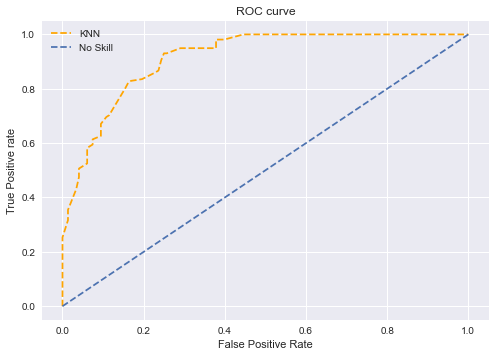

In [375]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

In [376]:
#Running knn.predict_proba(X_test)[:,1] get the predicted probabilities of the positive label only, which yield as below:-

#probability2= knn.predict_proba(X_test1)[:,1]
#probability2

# SVM Support Vector Machine Algorithm

In [377]:
"""when the feature variables are more than observations SVM work very well.
In some special important observation few no. of rows but large no. of variables. need SVM to solve it.
SVM become vaery famous in 1990 when the Deep learning was not achieved accepted success.
But the problem with SVM when we have large number of data , observation it wont work perfet it need expensive 
computational time.
Till 2012 SVM was famous . now DEEP learning  has replaced many a application.
When we have large no. of features say 100 or more for the other algorithms like Logistic Regression DT,
Random forest (it will make 100 + decision tree which is not feasible, computational time consuming .)"""

# To calculate the accuracy score of the SVM model
#from sklearn.metrics import accuracy_score, confusion_matrix
  
from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svm = SVC(C= .1, kernel='linear', gamma= 1,probability=True)
svm.fit(X_train1, Y_train)
Y_pred_SVM_train = svm .predict(X_train1)
Y_pred_SVM_test = svm .predict(X_test1)
# check the accuracy on the training set
print("traing accuracy",svm.score(X_train1, Y_train1))
print("testing accuracy",svm.score(X_test1, Y_test1))

traing accuracy 0.8665730337078652
testing accuracy 0.8464052287581699


[[121  27]
 [ 20 138]]


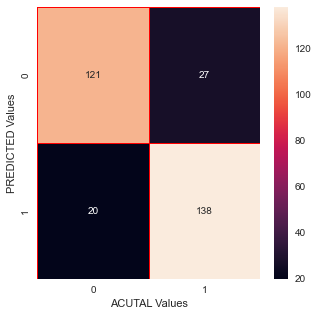

In [378]:
# confusion matrix
SVM_conf_mat=confusion_matrix(Y_test1,Y_pred_SVM_test)
print(confusion_matrix(Y_test1,Y_pred_SVM_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(SVM_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X_test)
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [379]:
"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =121,  False Positive(TYPE I ERROR) =27,FN: False Negative(TYPE II ERROR)= 20, True Negative : 138
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [380]:
print("## CLASSIFICATION REPORT SVM TRAINING MODEL ######")
print(classification_report(Y_train1,Y_pred_SVM_train))
print("## CLASSIFICATION REPORT SVM TESTING MODEL  ######")
print(classification_report(Y_test1,Y_pred_SVM_test))

## CLASSIFICATION REPORT SVM TRAINING MODEL ######
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       347
           1       0.85      0.89      0.87       365

    accuracy                           0.87       712
   macro avg       0.87      0.87      0.87       712
weighted avg       0.87      0.87      0.87       712

## CLASSIFICATION REPORT SVM TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       148
           1       0.84      0.87      0.85       158

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



In [381]:
from sklearn.metrics import roc_auc_score



# predict probabilities
probability_prediction_positive_svm = svm.predict_proba(X_test1)[:,1]

# auc scores
auc_score_svm = roc_auc_score(Y_test1, probability_prediction_positive_svm)


from sklearn.metrics import roc_curve

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(Y_test1, probability_prediction_positive_svm, pos_label=1)




print("AUC SCORE:",auc_score_svm)
#print("#######"*5)
#print("value of FPR", fpr1)
#print("#######"*5)
#print("Values of TPR",tpr1)
#print("#######"*5)
#print("values of Threshold", thresh1)

AUC SCORE: 0.8942866917550462


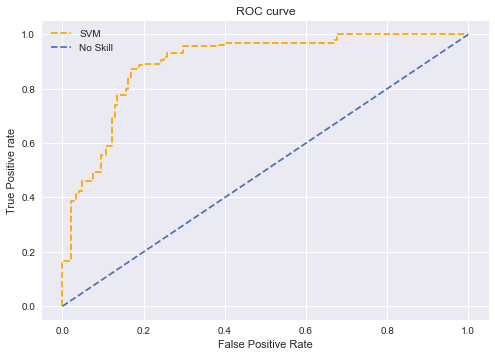

In [382]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='SVM')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

# LOGISTIC REGRESSION

In [383]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)# by default max_iter=100. there is no much difference in accuracy changing it.
lr.fit(X_train1,Y_train)

LogisticRegression(max_iter=200)

In [384]:
Y_pred_lr_train=lr.predict(X_train1)
Y_pred_lr_test=lr.predict(X_test1)

In [385]:
print("LOGISTIC REGRESSION TRAINING ACCURACY ",accuracy_score(Y_train1,Y_pred_lr_train))
print("######"*20)
print("LOGISTIC REGRESSION TESTING ACCURACY ",accuracy_score(Y_test1,Y_pred_lr_test))

LOGISTIC REGRESSION TRAINING ACCURACY  0.8623595505617978
########################################################################################################################
LOGISTIC REGRESSION TESTING ACCURACY  0.8398692810457516


# CONFUSION METRIX

[[122  26]
 [ 23 135]]


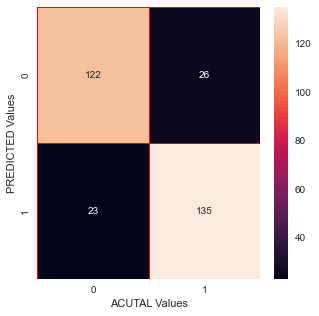

In [386]:
lr_conf_mat=confusion_matrix(Y_test1,Y_pred_lr_test)
print(confusion_matrix(Y_test1,Y_pred_lr_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X_test)
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [387]:
"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =122,  False Positive(TYPE I ERROR) =26,FN: False Negative(TYPE II ERROR)= 23, True Negative : 135
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [388]:
print("## CLASSIFICATION REPORT DT TRAINING MODEL ######")
print(classification_report(Y_train1,Y_pred_lr_train))
print("## CLASSIFICATION REPORT DT TESTING MODEL  ######")
print(classification_report(Y_test1,Y_pred_lr_test))

## CLASSIFICATION REPORT DT TRAINING MODEL ######
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       347
           1       0.85      0.89      0.87       365

    accuracy                           0.86       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.86      0.86      0.86       712

## CLASSIFICATION REPORT DT TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       148
           1       0.84      0.85      0.85       158

    accuracy                           0.84       306
   macro avg       0.84      0.84      0.84       306
weighted avg       0.84      0.84      0.84       306



# DECISION TREE

In [389]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
# here by default criterion is GINI
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [390]:
Y_pred_dt_train=dt.predict(X_train)
Y_pred_dt_test=dt.predict(X_test)

In [391]:
print("DECISION TREE CLASSIFIER TRAINING ACCURACY ",accuracy_score(Y_train,Y_pred_dt_train))
print("######"*20)
print("DECISION TREE CLASSIFIER TESTING ACCURACY ",accuracy_score(Y_test,Y_pred_dt_test))

DECISION TREE CLASSIFIER TRAINING ACCURACY  1.0
########################################################################################################################
DECISION TREE CLASSIFIER TESTING ACCURACY  0.9607843137254902


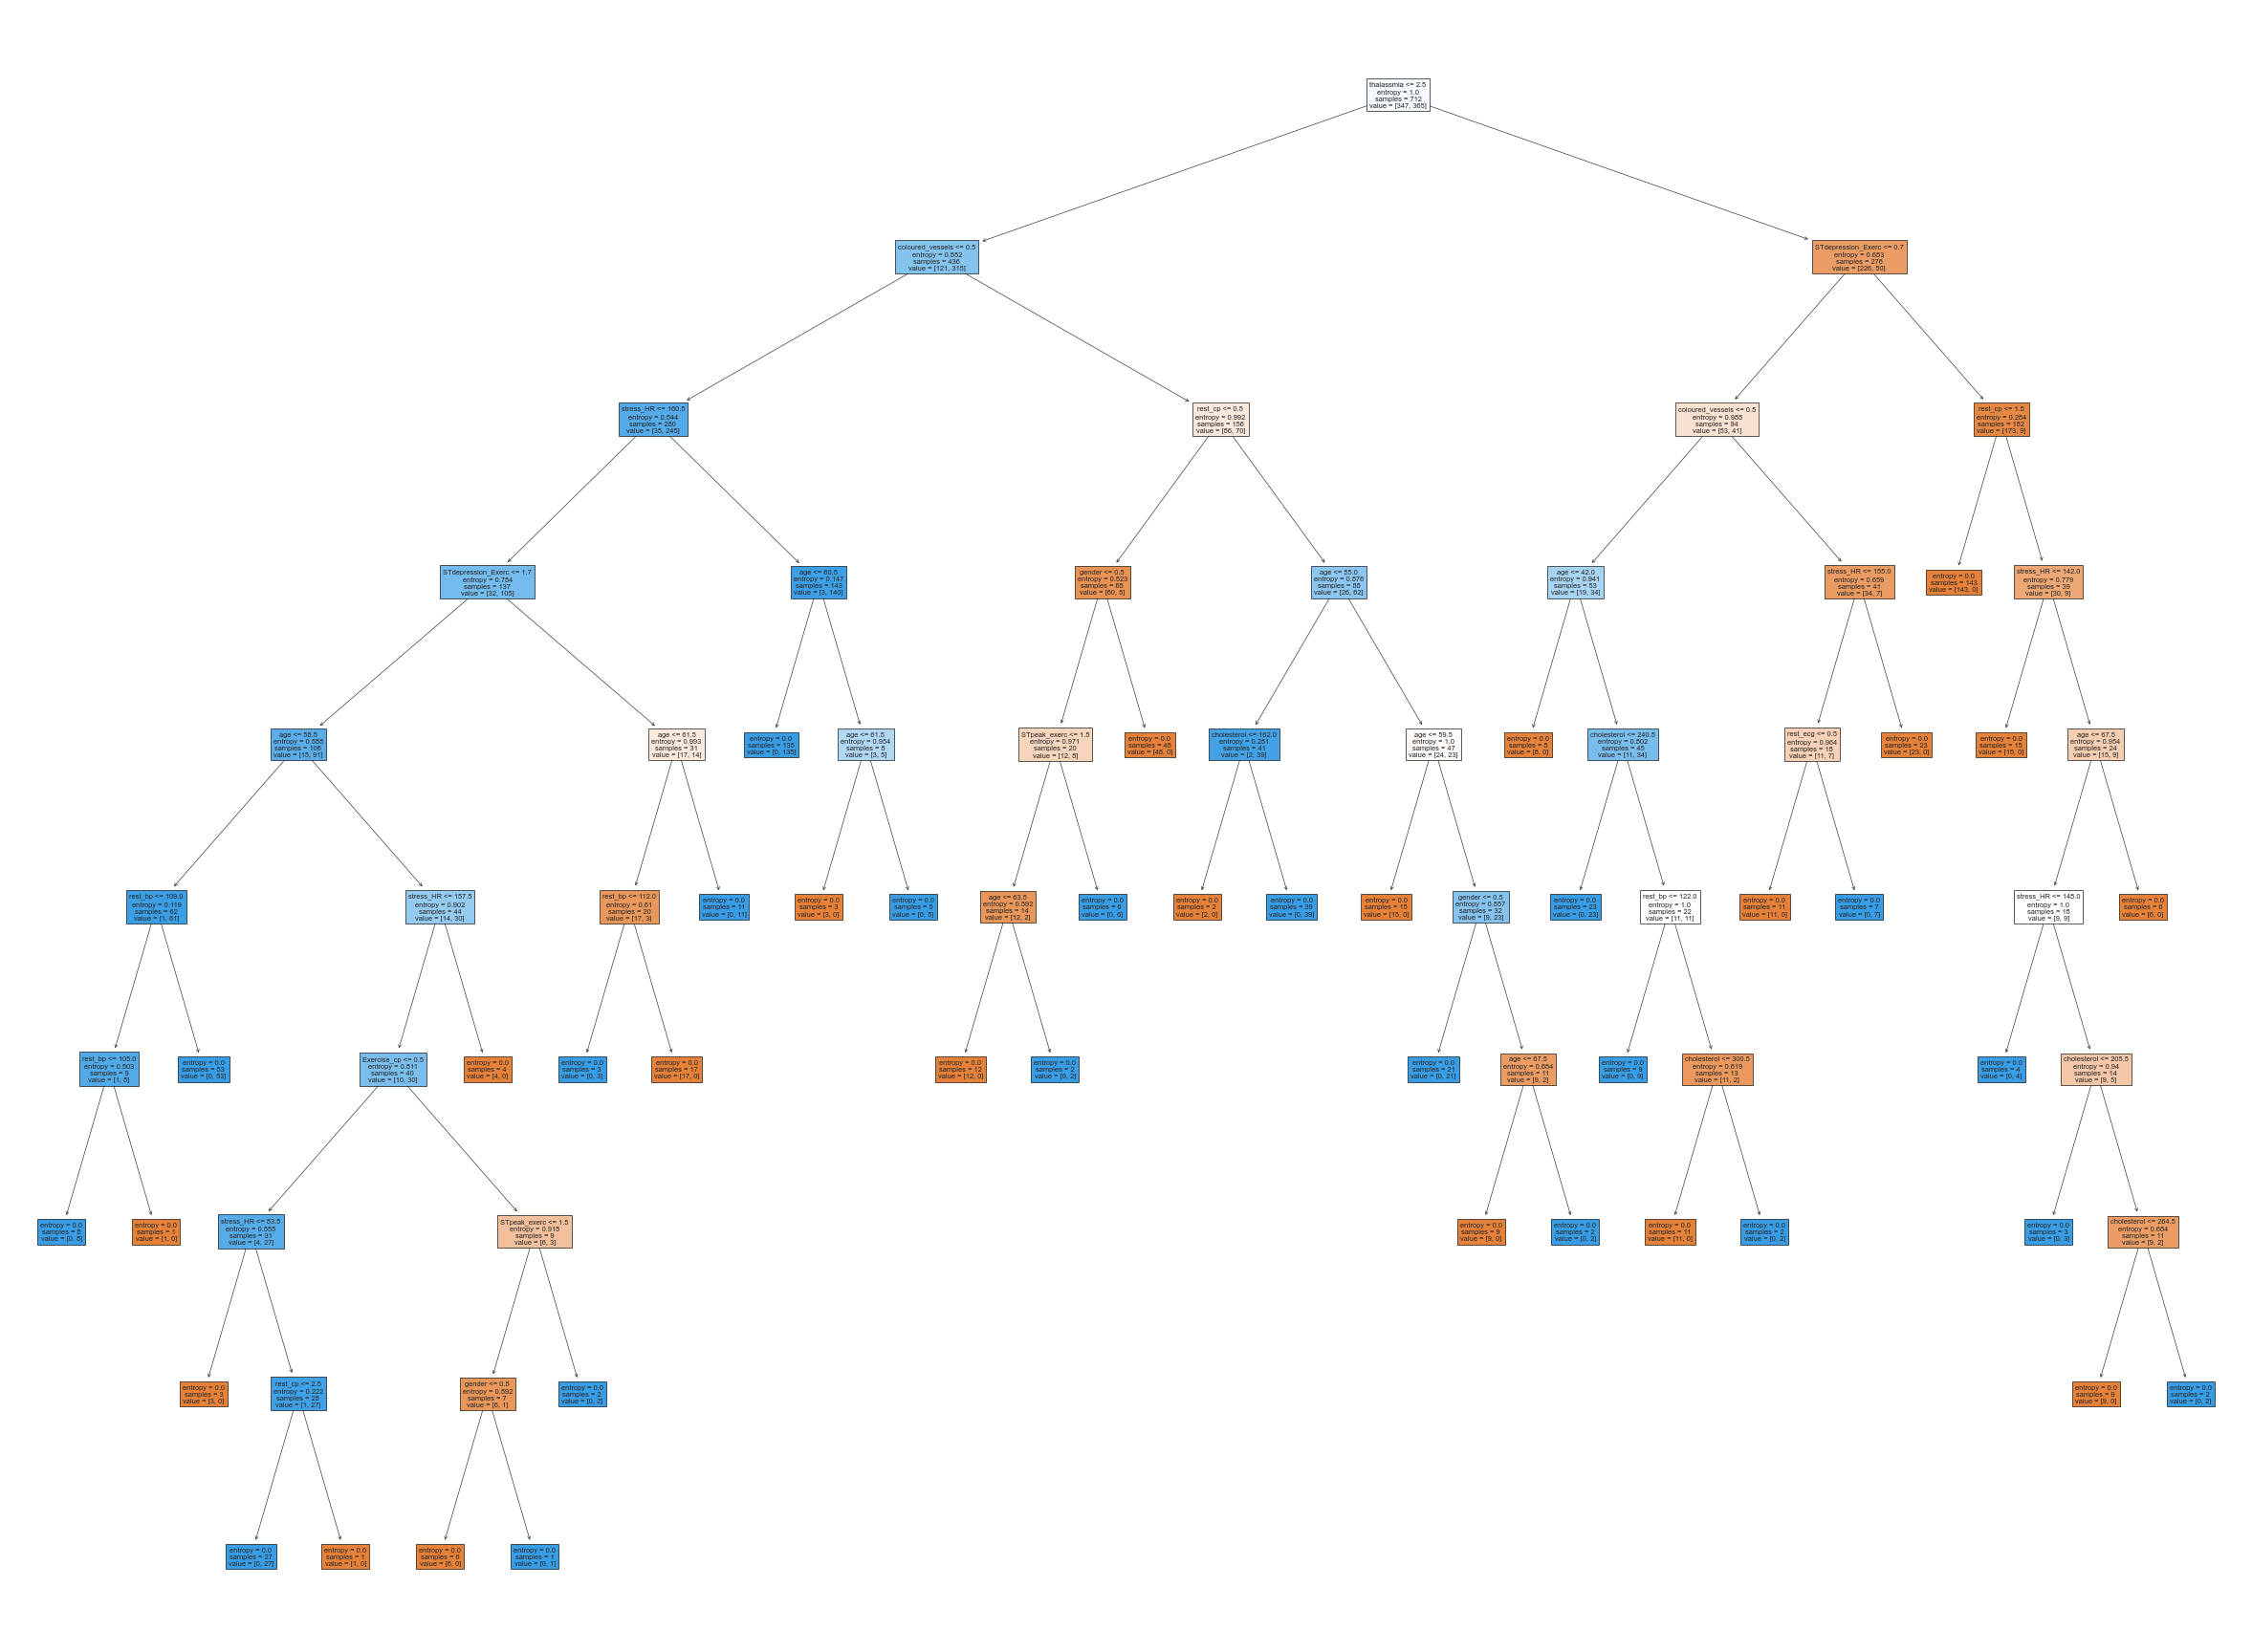

In [392]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [393]:
#HERE THE HUGE NUMBER OF BRANCHES IN THE DECISION TREE, in case it is a overfitting problem we can reduce the branches.
#PRUNNING :- STEP OF CUTTING BRANCHES OF THE TREE OR DECIDING THE NO. OF BRANCHES(CUSTOMIZATION) 


In [394]:
# WE HAVE TO CREATE A USER DEFINED FUNCTION

In [395]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(Y_test,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

In [396]:
#Hyperparameter in decision Tree

In [397]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [398]:
# prunned model decision tree classifier with max branch =3 has created

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       148
           1       0.82      0.80      0.81       158

    accuracy                           0.81       306
   macro avg       0.81      0.81      0.81       306
weighted avg       0.81      0.81      0.81       306





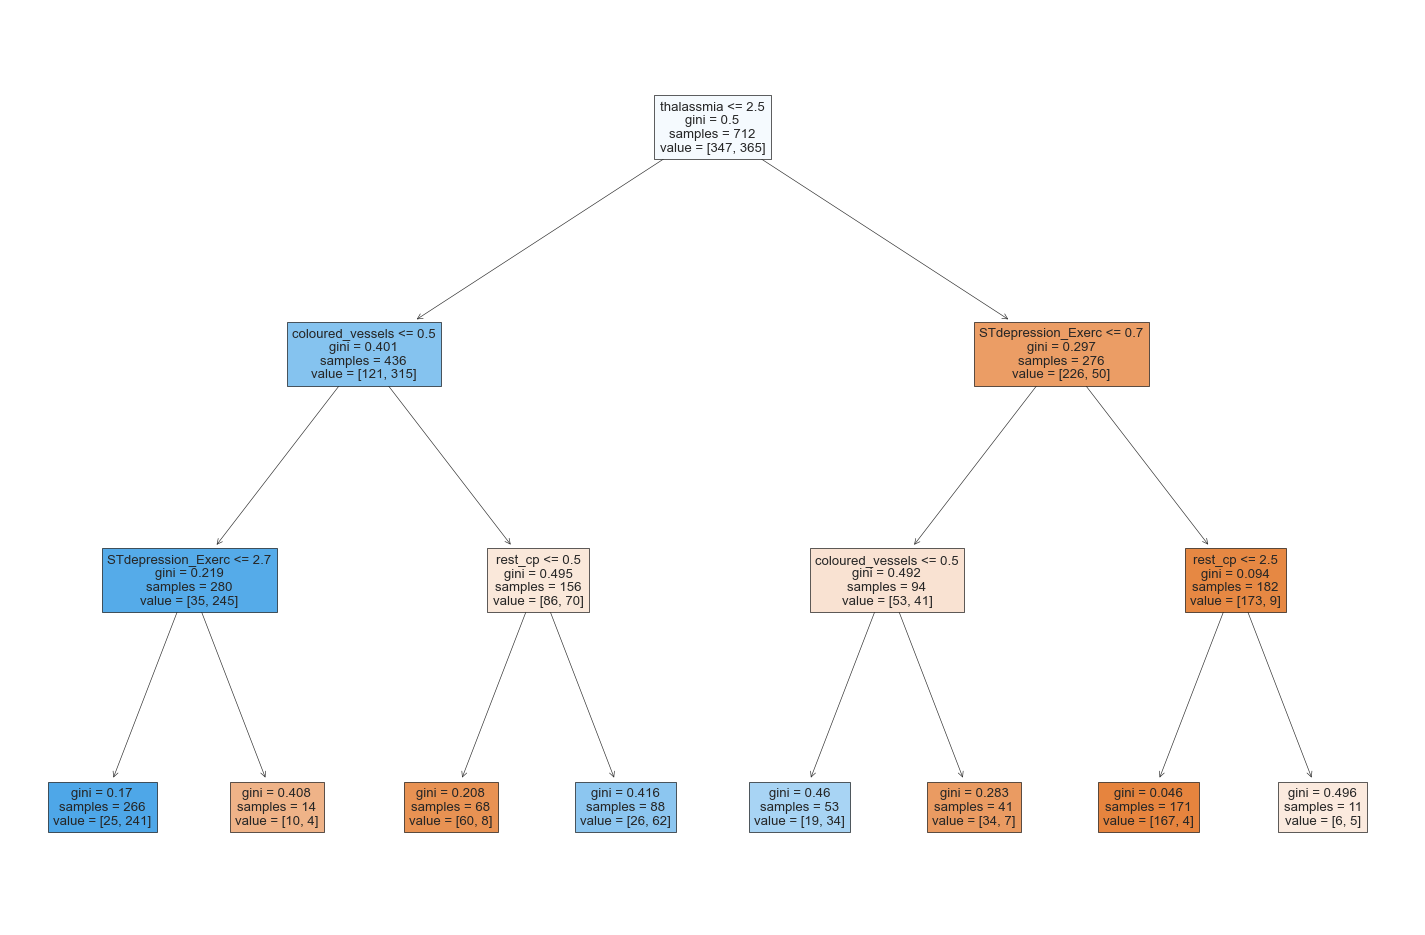

In [399]:
report_model(pruned_tree)

In [400]:
pruned_tree5=DecisionTreeClassifier(max_depth=5)
pruned_tree5.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [401]:
# prunned model decision tree classifier with max branch =5 has created

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       148
           1       0.92      0.84      0.88       158

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306





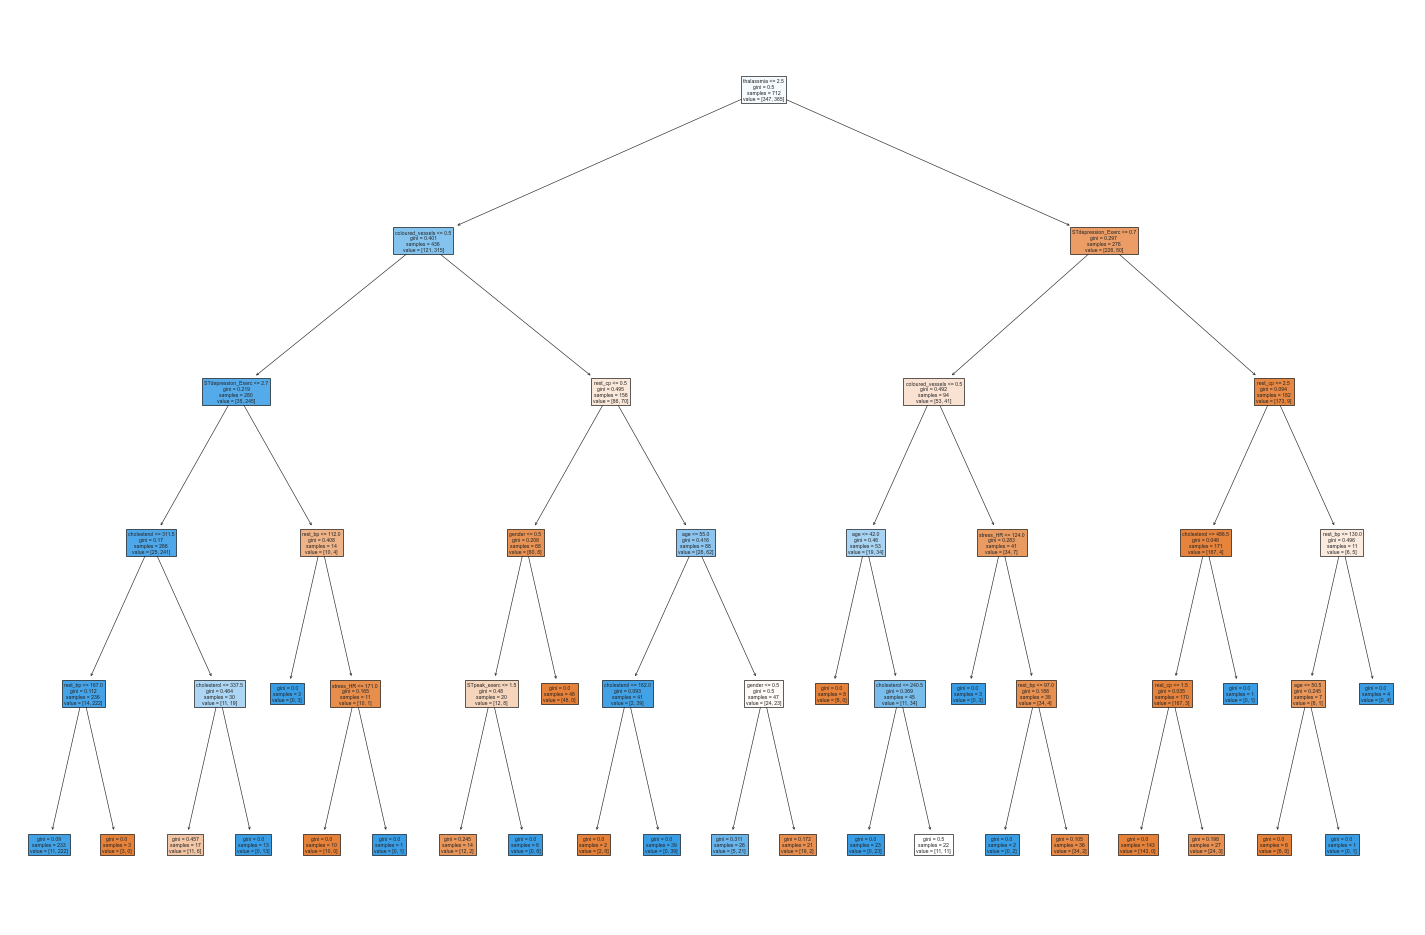

In [402]:
report_model(pruned_tree5)

[[148   0]
 [ 12 146]]


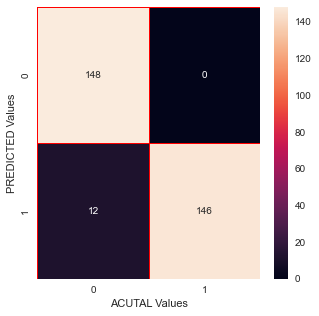

In [403]:
# confusion matrix
dt_conf_mat=confusion_matrix(Y_test,Y_pred_dt_test)
print(confusion_matrix(Y_test,Y_pred_dt_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X_test)
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [404]:
"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =148,  False Positive(TYPE I ERROR) =0,FN: False Negative(TYPE II ERROR)= 12, True Negative : 146
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [405]:
print("## CLASSIFICATION REPORT DT TRAINING MODEL ######")
print(classification_report(Y_train,Y_pred_dt_train))
print("## CLASSIFICATION REPORT DT TESTING MODEL  ######")
print(classification_report(Y_test,Y_pred_dt_test))

## CLASSIFICATION REPORT DT TRAINING MODEL ######
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

## CLASSIFICATION REPORT DT TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.92      0.96       158

    accuracy                           0.96       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.96      0.96      0.96       306



In [406]:
from sklearn.metrics import roc_auc_score



# predict probabilities
probability_prediction_positive_dt = dt.predict_proba(X_test)[:,1]

# auc scores
auc_score1_dt = roc_auc_score(Y_test, probability_prediction_positive_dt)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1_dt, tpr1_dt, thresh1_dt = roc_curve(Y_test, probability_prediction_positive_dt, pos_label=1)




print("AUC SCORE:",auc_score1_dt)
#print("#######"*5)
#print("value of FPR", fpr1)
#print("#######"*5)
#print("Values of TPR",tpr1)
#print("#######"*5)
#print("values of Threshold", thresh1)

AUC SCORE: 0.9620253164556962


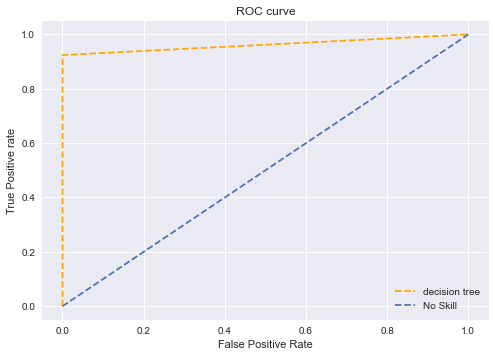

In [407]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_dt, tpr1_dt, linestyle='--',color='orange', label='decision tree')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

# FEATURE IMPORTANCE

In [408]:
dt.feature_importances_

array([0.17910139, 0.05643201, 0.09800825, 0.04711446, 0.06583207,
       0.        , 0.02438402, 0.08991489, 0.00981961, 0.08164778,
       0.02144043, 0.11303706, 0.21326804])

In [409]:
pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=["Feature Importance"])

,Feature Importance
age,0.179101
gender,0.056432
rest_cp,0.098008
rest_bp,0.047114
cholesterol,0.065832
fast_bloodsugar,0.000000
rest_ecg,0.024384
stress_HR,0.089915
Exercise_cp,0.009820
STdepression_Exerc,0.081648


# Bagging model

In [410]:
# Bagging Model can reduce the variance without impacting the Bias.
# We prefer to use Bagging when low Bias & high Variance.
# but it is a black box technology, complicated .


from sklearn.ensemble import BaggingClassifier
# as it is a classification problem so we are importing classifier
#In case of regression problem  we use to import BaggingRegressor()

bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)

BaggingClassifier()

In [411]:
Y_pred_BM_train=bagging.predict(X_train)
Y_pred_BM_test=bagging.predict(X_test)



In [412]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [413]:
print("Bagging Model training accuracy", accuracy_score(Y_train,Y_pred_BM_train))
print("######" *5)
print("Bagging Model testing accuracy", accuracy_score(Y_test,Y_pred_BM_test))

Bagging Model training accuracy 1.0
##############################
Bagging Model testing accuracy 0.9607843137254902


In [414]:
print("CLASSIFICATION REPORT ON TRAINING  \n " , classification_report(Y_train,Y_pred_BM_train))
print("######"*20)
print("CLASSIFICATION REPORT ON TEST  \n ",classification_report(Y_test,Y_pred_BM_test))

CLASSIFICATION REPORT ON TRAINING  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

########################################################################################################################
CLASSIFICATION REPORT ON TEST  
                precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.92      0.96       158

    accuracy                           0.96       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.96      0.96      0.96       306



In [415]:
BM_conf_mat=confusion_matrix(Y_test,Y_pred_BM_test)
print(confusion_matrix(Y_train,Y_pred_BM_train))
print("######"*20)
print(confusion_matrix(Y_test,Y_pred_BM_test))

[[347   0]
 [  0 365]]
########################################################################################################################
[[148   0]
 [ 12 146]]


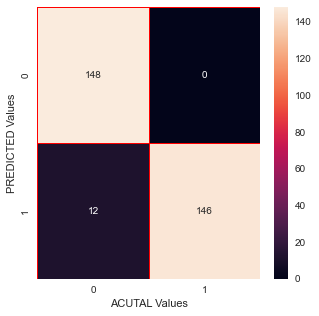

In [416]:
plt.subplots(figsize=(5,5))
sns.heatmap(BM_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X_test)
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [417]:
"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =148,  False Positive(TYPE I ERROR) =0,FN: False Negative(TYPE II ERROR)= 9, True Negative : 149
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [418]:
print("BAGGING METHOD TRAINING ACCURACY",accuracy_score(Y_train,Y_pred_BM_train))
print("######"*20)
print("BAGGING METHOD TESTING ACCURACY",accuracy_score(Y_test,Y_pred_BM_test))

BAGGING METHOD TRAINING ACCURACY 1.0
########################################################################################################################
BAGGING METHOD TESTING ACCURACY 0.9607843137254902


In [419]:
#  MOSTLY THE RANDOM FOREST USE IN REAL TIME IN PLACE OF LOGISTIC REGRESSION,DECISION TREE.
# SUPPORT VECTOR MACHINE IS MOSTLY USE IN CASE OF BOT PREPRATION(CLASSIFICATION BOT).
# SUPPRT VECTOR MACHINE-SVM IS AGILE ALGORITHM , WHERE WE HAVE APPROACH (KERNEL MEANS APPROACH)
# VARIETIES OF APPROACH IN SVM LIKE LINEAR ,SIGMOID,POLYNOMIAL,RADIAL BASAL FUNCTION.
#MORE THAN 200 RESEARCH PAPERS ON SVM.

# RF IS BEST MODEL AND WIDELY USED.
# IN SPECIAL CASE WHEN WE HAVE VERY LESS DATA , OR WE HAVE CLINICAL SECTOR DATA THAN WE PREFER KNN METHOD .


# EVERY MODEL HAS ITS OWN SIGNIFICANT AS PER THE REQUIREMENT AND APPLICATION.



In [420]:
# IN BAGGING METHOD ROW WISE REPLACEMENT SAMPLE CREATED.
# THERE MAY BE CHANCES THAT THE TEST DATA MAY BE ENTIRELY DIFFERENT THAN TRAIN DATA 
# IT IS CALLED DATA LEACKAGE( EXP PRACTICING MOCK TEST OF ANY EXAM , BUT IN REAL EXAM PAPER ARE NOT PATTERN AS PER MOCK TEST OR THE SYLLUBUS OUT OF RANGE)
# IN RANDOM FOREST THERE IS ADVANCE TO ROW WISE AS WELL AS COLUMN WISE REPLACEMENT SAMPLING.
# SOME PART OF DATA ARE RESERVED IN OOB, FOR CROSS VALIDATION.
# SO IN RANDOM FOREST THERE IS LESS CHANCES FOR DATA LEACKAGE.

# RANDOM FOREST METHOD ENTROPY

In [421]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,criterion="entropy")
# here in RF by default we are getting no. of estimation(n_estimator=100) 100
#n_estimators: We know that a random forest is nothing but a group of many decision trees, 
#the n_estimator parameter controls the number of trees inside the classifier.it is 100 bagging , 100 sample creation.
# we can change the no. of estimation(n_estimator=200/500 any number).
# in RF by default the criterion is GINI, We can change it to ENTROPY.
# in Bagging case by default the no. of estimation 10

In [422]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [423]:
# RANDOM FOREST MODEL BUILDING COMPLETED.

In [424]:
Y_pred_rf_train=rf.predict(X_train)
Y_pred_rf_test=rf.predict(X_test)

In [425]:
print("RANDOM FOREST METHOD ENTROPY TRAINING ACCURACY ",accuracy_score(Y_train,Y_pred_rf_train))
print("######"*20)
print("RANDOM FOREST METHOD ENTROPY TESTING ACCURACY ",accuracy_score(Y_test,Y_pred_rf_test))

RANDOM FOREST METHOD ENTROPY TRAINING ACCURACY  1.0
########################################################################################################################
RANDOM FOREST METHOD ENTROPY TESTING ACCURACY  0.9901960784313726


[[347   0]
 [  0 365]]
########################################################################################################################
[[148   0]
 [  3 155]]


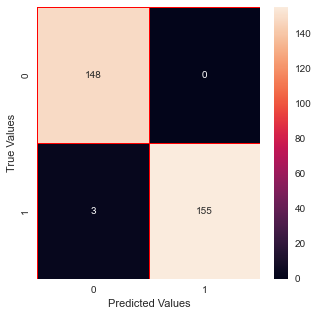

In [426]:
RF_conf_mat=confusion_matrix(Y_test,Y_pred_rf_test)
print(confusion_matrix(Y_train,Y_pred_rf_train))
print("######"*20)
print(confusion_matrix(Y_test,Y_pred_rf_test))

plt.subplots(figsize=(5,5))
sns.heatmap(RF_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",data=X_test)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [427]:
# it is considered as Grey Box technology little more transperent than Bagging

"""True Positive (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Negative (Bottom-Right Quadrant)"""

# TN: True Positive =148,  False Positive(TYPE I ERROR) =0,FN: False Negative(TYPE II ERROR)= 9, True Negative : 149
"""IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR 
    FALSE NEGATIVE IS TYPE II ERROR."""

'IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR \n    FALSE NEGATIVE IS TYPE II ERROR.'

In [428]:
print("## CLASSIFICATION REPORT RANDOM FOREST TRAINING MODEL ######")
print(classification_report(Y_train,Y_pred_rf_train))
print("## CLASSIFICATION REPORT RANDOM FOREST TESTING MODEL  ######")
print(classification_report(Y_test,Y_pred_rf_test))

## CLASSIFICATION REPORT RANDOM FOREST TRAINING MODEL ######
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

## CLASSIFICATION REPORT RANDOM FOREST TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       148
           1       1.00      0.98      0.99       158

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



In [429]:
# get Feature importance
importance = rf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10076
Feature: 1, Score: 0.04833
Feature: 2, Score: 0.10048
Feature: 3, Score: 0.07434
Feature: 4, Score: 0.09139
Feature: 5, Score: 0.00907
Feature: 6, Score: 0.01984
Feature: 7, Score: 0.10110
Feature: 8, Score: 0.05350
Feature: 9, Score: 0.12071
Feature: 10, Score: 0.06100
Feature: 11, Score: 0.10714
Feature: 12, Score: 0.11234


In [430]:
# almost all features are significance some are more some are less.

In [431]:
from matplotlib import pyplot

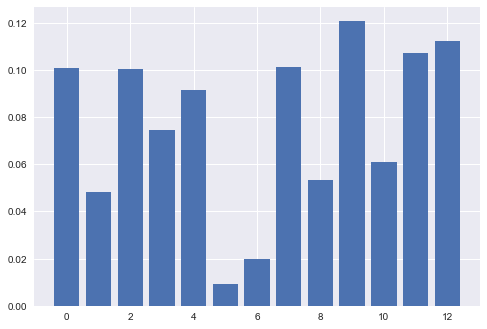

In [432]:
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[0.07093333 0.05458256 0.13157123 0.06190097 0.06244925 0.01738189
 0.03695504 0.08203602 0.10052306 0.08412013 0.06689806 0.12060907
 0.11003939]


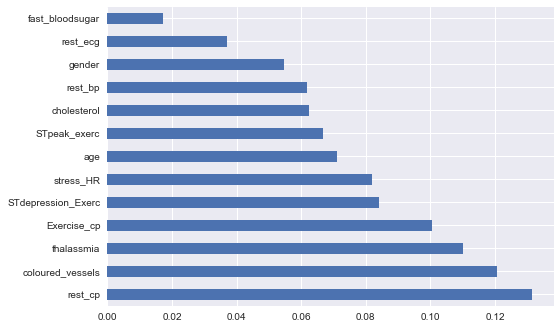

In [433]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [434]:
#The XGBoost library provides a built-in function to plot features ordered by their importance. 
#The function is called plot_importance ()

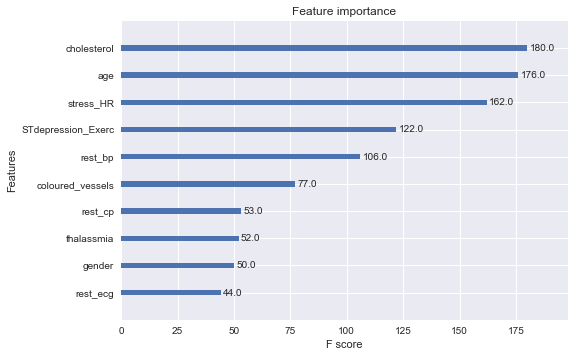

In [435]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier(n_estimators=100)
model.fit(X, Y)
# plot feature importance
plot_importance(model,max_num_features=10) # top 10 most important features
pyplot.show()